# Case Study Model Selection

**Data**: Some house price data from Kaggle

https://www.kaggle.com/c/house-prices-advanced-regression-techniques

In [1]:
import numpy as np # rechnen
import pandas as pd # rechnen
import matplotlib.pyplot as plt #plotten
import seaborn as sns #plotten
%matplotlib inline

sns.set_style('white')
pd.set_option('display.max_columns', 20)

## Data import

In [2]:
#Read a comma-separated values (csv) file into DataFrame
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## EDA

(Exploratory data analysis)


In [3]:
# Some first descriptives
df.describe()
# YearBuilt min  in year 1872 and max in year 2010
# insgesamt haben wir 1460 Beobachtungen-> 1460 verschiedene Häuse Käufe

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
df['SalePrice'].describe() # hier haben wir 1460 Beobachtungen, teuerste Wohnung ist 755000

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [7]:
df['PoolQC'].describe() #Oooops! hier nur 7 Beobachtungen-> 1453 missing data!
df['LotFrontage'].describe() # Oooops! hier nur 1201 Beobachtungen -> 259 missing date!

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

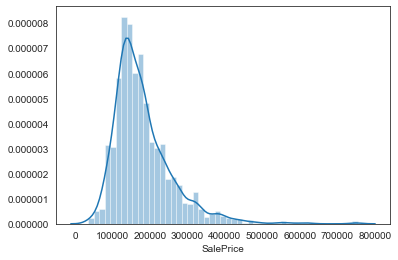

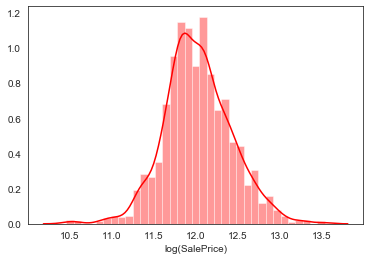

In [152]:
# Analysis of the dependent variable = die Verteilung meiner Abhängigen Variable
#Bevor ich überhaupt gedanken über Modell machen muss, muss ich überlegen, welche Verteilung y hat! 
sns.distplot(df['SalePrice']) # nicht normal verteilt!-> Lösung: Log Transformation
plt.show()
sns.distplot(np.log(df['SalePrice']),color="red")# weil y normal verteilt sein muss-> log Transformation
plt.xlabel('log(SalePrice)')
plt.show()
# wir können auch überlegen, Gamma Verteilung zu schätzen, wenn wir keine Log-Transformation machen!

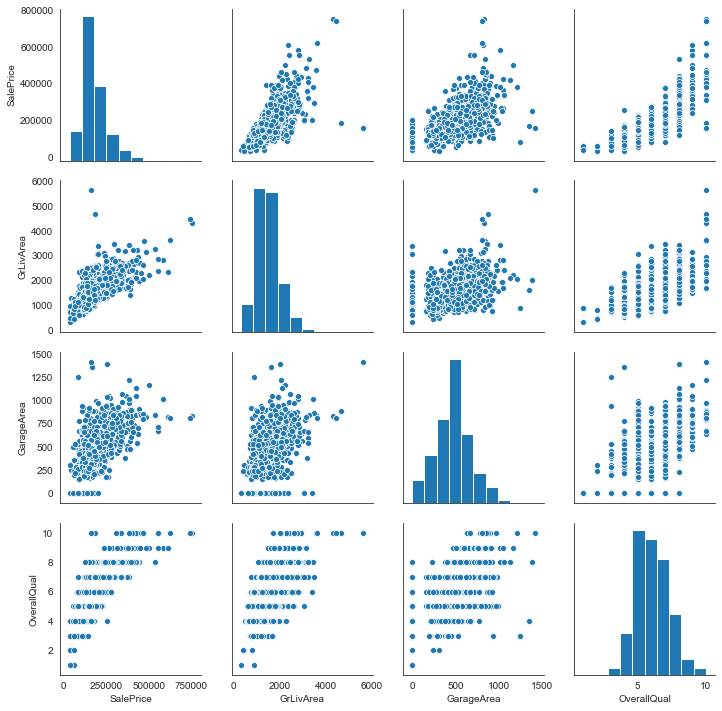

In [10]:
# Analysis of (highly correlated) independent variables 
# Korrelationen
df1 = df[['SalePrice','GrLivArea','GarageArea','OverallQual']] #OverallQual ist Dummy variable-> es gibt 10 verschienden Qualität Merkmale 1 ist schlecht und 10 ist die beste
# df1
# Metric independent variables
sns.pairplot(df1) 
# Metric independent variables
#sns.pairplot(df1, plot_kws={'color':'gray'}, diag_kws={'color':'grey'}) #we make another color with this code!
plt.show()


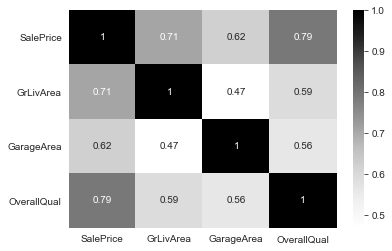

In [154]:
# je schwärzer die Farbe ist, desto höher ist die Korrelation zwischen Variablen
# -> bspw. je höher die OverallQual, desto höher ist die Saleprice
# -> bspw. je größer meine Wohnung, desto mehr kostet/SalePrice
sns.heatmap(df1.corr(), annot=True , cmap='Greys') 
# wir können auch corrmat=df1.corr() machen dann corrmat als input in heatmap Funktion benutzen
# 
plt.show()

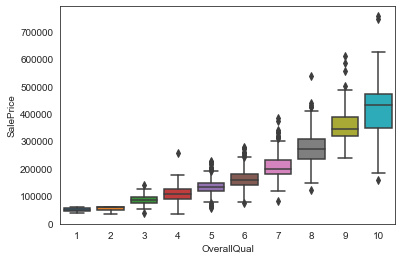

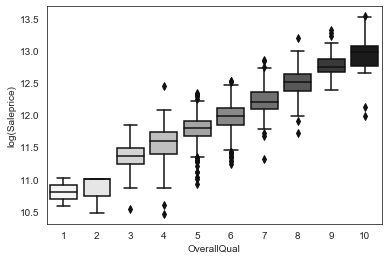

In [155]:
# andere Darstellung, was wie oben gesehen haben. Hier schauen wir die Streuung innerhalb verschienden Kategorien an
# -> Die Streuung innerhalb verschiedenen Klassen

sns.boxplot(x=df1['OverallQual'], y=df1['SalePrice'])
plt.show()

sns.boxplot(x=df1['OverallQual'], y=np.log(df1['SalePrice']), palette='Greys') #hier nützen wir log(['SalePrice'])
plt.ylabel('log(Saleprice)')
plt.show()

# الظاهر كل مازادت الجودة كل مازاد السعر

## Preporcessing

**Note**: Dummy Coding is nessecary for categorical data - especially if nominal

Alternative for ordinal data is `sklearn.preprocessing.LabelEncoder()`

### Conversion of ordinal types

In [12]:
#df.info()
df.head()
# Problem: In unserem DataFrame gibt es manche kategorialen Variable wie Street oder SaleCondition, die nicht numerisch sind
# Lösung -> man muss kategoriale Variable in numerischen Variable umkodieren, weil in OLS nur Zahlen geht

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [16]:
# spalte ExterQual 
# df['ExterQual']

In [17]:
# für jedes Wort muss ein Zahl definiert werden 5,4,3,2,1 -> aber bis jetzt haben wir keine echte Zahlen
# -> diese Zahlen müssen noch nicht im unseren Modell genützt werden sondern wir müssen Dummies kodieren -> يعني لسا نحولها لارقام صفر او واحد

df.loc[df['ExterQual'] == 'Ex','ExterQual'] = 5   # جيبلي من عمود بالداتا فريم السطر اللي قيمته اي اكس وحط قيمته ٥
df.loc[df['ExterQual'] == 'Gd','ExterQual'] = 4
df.loc[df['ExterQual'] == 'TA','ExterQual'] = 3
df.loc[df['ExterQual'] == 'Fa','ExterQual'] = 2

df.loc[df['BsmtFinType1'] == 'GLQ','BsmtFinType1'] = 6
df.loc[df['BsmtFinType1'] == 'ALQ','BsmtFinType1'] = 5
df.loc[df['BsmtFinType1'] == 'BLQ','BsmtFinType1'] = 4
df.loc[df['BsmtFinType1'] == 'Rec','BsmtFinType1'] = 3
df.loc[df['BsmtFinType1'] == 'LwQ','BsmtFinType1'] = 2
df.loc[df['BsmtFinType1'] == 'Unf','BsmtFinType1'] = 1 

df.loc[df['BsmtQual'] == 'Ex','BsmtQual'] = 5
df.loc[df['BsmtQual'] == 'Gd','BsmtQual'] = 4
df.loc[df['BsmtQual'] == 'TA','BsmtQual'] = 3
df.loc[df['BsmtQual'] == 'Fa','BsmtQual'] = 2
df.loc[df['BsmtQual'] == 'Po','BsmtQual'] = 1  

df.loc[df['Functional'] == 'Typ','Functional'] = 7
df.loc[df['Functional'] == 'Min1','Functional'] = 6
df.loc[df['Functional'] == 'Min2','Functional'] = 5
df.loc[df['Functional'] == 'Mod','Functional'] = 4
df.loc[df['Functional'] == 'Maj1','Functional'] = 3
df.loc[df['Functional'] == 'Maj2','Functional'] = 2
df.loc[df['Functional'] == 'Sev','Functional'] = 1

df.loc[df['HeatingQC'] == 'Ex','HeatingQC'] = 5
df.loc[df['HeatingQC'] == 'Gd','HeatingQC'] = 4
df.loc[df['HeatingQC'] == 'TA','HeatingQC'] = 3
df.loc[df['HeatingQC'] == 'Fa','HeatingQC'] = 2
df.loc[df['HeatingQC'] == 'Po','HeatingQC'] = 1  

df.loc[df['FireplaceQu'] == 'Ex','FireplaceQu'] = 5
df.loc[df['FireplaceQu'] == 'Gd','FireplaceQu'] = 4
df.loc[df['FireplaceQu'] == 'TA','FireplaceQu'] = 3
df.loc[df['FireplaceQu'] == 'Fa','FireplaceQu'] = 2
df.loc[df['FireplaceQu'] == 'Po','FireplaceQu'] = 1 

# Dummies Kodierung -> man muss 5,4,3,2,1 zu 0,1 umkodieren
df1=df.select_dtypes(exclude=['object'])

df_dummies=pd.concat([pd.get_dummies(df['ExterQual'], prefix='ExterQual',drop_first=True),
                      pd.get_dummies(df['BsmtQual'], prefix='BsmtQual',drop_first=True),
                      pd.get_dummies(df['HeatingQC'], prefix='HeatingQC',drop_first=True),
                      pd.get_dummies(df['BsmtFinType1'], prefix='BsmtFinType1',drop_first=True),
                      pd.get_dummies(df['Functional'], prefix='Functional',drop_first=True),
                      pd.get_dummies(df['FireplaceQu'], prefix='FireplaceQu',drop_first=True)],axis=1)
# اسع هذا الاخير
df_final=pd.concat([df_dummies, df1['LotFrontage LotArea YearBuilt GrLivArea FullBath Fireplaces GarageArea SalePrice'.split()]],axis=1)


#pd.get_dummies

In [18]:
# ich habe das gemacht
df_dummies.head()


,ExterQual_3,ExterQual_4,ExterQual_5,BsmtQual_3,BsmtQual_4,BsmtQual_5,HeatingQC_2,HeatingQC_3,HeatingQC_4,HeatingQC_5,...,Functional_2,Functional_3,Functional_4,Functional_5,Functional_6,Functional_7,FireplaceQu_2,FireplaceQu_3,FireplaceQu_4,FireplaceQu_5
0,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
2,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
3,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
4,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0


### Final data frame 

(including dummy coding)

In [19]:
df_final.head()

,ExterQual_3,ExterQual_4,ExterQual_5,BsmtQual_3,BsmtQual_4,BsmtQual_5,HeatingQC_2,HeatingQC_3,HeatingQC_4,HeatingQC_5,...,FireplaceQu_4,FireplaceQu_5,LotFrontage,LotArea,YearBuilt,GrLivArea,FullBath,Fireplaces,GarageArea,SalePrice
0,0,1,0,0,1,0,0,0,0,1,...,0,0,65.0,8450,2003,1710,2,0,548,208500
1,1,0,0,0,1,0,0,0,0,1,...,0,0,80.0,9600,1976,1262,2,1,460,181500
2,0,1,0,0,1,0,0,0,0,1,...,0,0,68.0,11250,2001,1786,2,1,608,223500
3,1,0,0,1,0,0,0,0,1,0,...,1,0,60.0,9550,1915,1717,1,1,642,140000
4,0,1,0,0,1,0,0,0,0,1,...,0,0,84.0,14260,2000,2198,2,1,836,250000


### Outliers

**Note**: We log-transform and `GrLivArea` and `SalcePrice` for comparability wih regression case

In [20]:
# OLS ist sehr sensitive zu Außreißer-> muss raus sein
df1 = df_final[df_final['GrLivArea'] < 4000]
# df1.head()
df1['GrLivArea'] = np.log(df1['GrLivArea'])
df1['SalePrice'] = np.log(df1['SalePrice'])

/Applications/Anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Applications/Anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [21]:
df1.head() # look at GrLivArea column values now!

,ExterQual_3,ExterQual_4,ExterQual_5,BsmtQual_3,BsmtQual_4,BsmtQual_5,HeatingQC_2,HeatingQC_3,HeatingQC_4,HeatingQC_5,...,FireplaceQu_4,FireplaceQu_5,LotFrontage,LotArea,YearBuilt,GrLivArea,FullBath,Fireplaces,GarageArea,SalePrice
0,0,1,0,0,1,0,0,0,0,1,...,0,0,65.0,8450,2003,7.444249,2,0,548,12.247694
1,1,0,0,0,1,0,0,0,0,1,...,0,0,80.0,9600,1976,7.140453,2,1,460,12.109011
2,0,1,0,0,1,0,0,0,0,1,...,0,0,68.0,11250,2001,7.487734,2,1,608,12.317167
3,1,0,0,1,0,0,0,0,1,0,...,1,0,60.0,9550,1915,7.448334,1,1,642,11.849398
4,0,1,0,0,1,0,0,0,0,1,...,0,0,84.0,14260,2000,7.695303,2,1,836,12.429216


### Train and test data

In [22]:
X = df1.drop('SalePrice', axis=1) #wir definieren unsere X, wo X beinhalter alle Variable außer SalePrice
# warum SalePrice ist raus? SalePrice ist unsere y-> wir möchten SalePrice prognosieren
y = df1['SalePrice'] 

In [23]:
X.head()
#X.info()

,ExterQual_3,ExterQual_4,ExterQual_5,BsmtQual_3,BsmtQual_4,BsmtQual_5,HeatingQC_2,HeatingQC_3,HeatingQC_4,HeatingQC_5,...,FireplaceQu_3,FireplaceQu_4,FireplaceQu_5,LotFrontage,LotArea,YearBuilt,GrLivArea,FullBath,Fireplaces,GarageArea
0,0,1,0,0,1,0,0,0,0,1,...,0,0,0,65.0,8450,2003,7.444249,2,0,548
1,1,0,0,0,1,0,0,0,0,1,...,1,0,0,80.0,9600,1976,7.140453,2,1,460
2,0,1,0,0,1,0,0,0,0,1,...,1,0,0,68.0,11250,2001,7.487734,2,1,608
3,1,0,0,1,0,0,0,0,1,0,...,0,1,0,60.0,9550,1915,7.448334,1,1,642
4,0,1,0,0,1,0,0,0,0,1,...,1,0,0,84.0,14260,2000,7.695303,2,1,836


In [24]:
y.head() # hier gibt SalePrice Daten nach Log-Transformation!

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

In [26]:
# X wird in Training Datensatz und Test Datensatz -> einfache Methode heißt train_test_split
from sklearn.model_selection import train_test_split

# mit Zufall wird mein Daten zu 30% Test-Daten und 70% Training-Daten gesplittet 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=77) 
X_train = X_train.copy()
X_test = X_test.copy()

In [27]:
# was müssen wir mit N/A bzw. Missing Values machen?
# wir definierern eine Funktion null_values, die ich meine DateFrame geben und sie gibt mir aus, wo Missing Values sind?
def null_values(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

null_values(X_train)
null_values(X_test)

# Missing Values!-> eine Lösung: durch Mittelwert ersetzten
X_train['LotFrontage'] = X_train['LotFrontage'].fillna(X_train['LotFrontage'].mean())
X_test['LotFrontage'] = X_test['LotFrontage'].fillna(X_test['LotFrontage'].mean())


Dataframe has 32 columns.
There are 1 columns that have missing values.
Dataframe has 32 columns.
There are 1 columns that have missing values.


### only 1 column has missing values! what about PoolQC or another columns???
### you have forgotten something! what?
### we are dealing now with X_train which comes form X which comes from df_final which has not all the columns 

## Model estimation
#### jetzt schätzen wir erste Modell -> wir beginnen mit Linear Regression

### `LinearRegression` (Reference)

In [28]:
from sklearn.linear_model import LinearRegression # importatnt: look at using shift tab and see example

In [29]:
linreg = LinearRegression()
linreg.fit(X_train, y_train) #Fit linear model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
linreg.coef_ # show me the coefficients

array([ 1.95939982e-01,  2.68201816e-01,  3.91672297e-01,  7.07886621e-02,
        1.09020638e-01,  2.08469220e-01,  6.59163578e-02,  9.91095085e-02,
        1.61049416e-01,  1.77698416e-01,  9.17821318e-02,  5.19734012e-02,
        8.45603966e-02,  1.09311373e-01,  1.15877310e-01,  2.78107814e-01,
        3.48128334e-01,  3.65867019e-01,  4.36645985e-01,  4.55809127e-01,
        5.40858494e-01,  2.68562672e-02, -4.51800063e-03,  4.35410448e-02,
        8.06834536e-02,  1.26185552e-03,  3.26429775e-06,  2.10879545e-03,
        4.92254891e-01,  8.67784690e-03,  5.93175109e-02,  2.89800205e-04])

**Evaluation**

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error #nehmen wir 2 Evaluation Metriken

In [32]:
# predicting using linear model 
# test + training اعمل توقع باستخدام
linreg_pred_is = linreg.predict(X_train) # In-sample: wie ist der Fit auf mein Trainings Daten ا 
linreg_pred_os = linreg.predict(X_test) # Out-Of-Sample: wie ist der Fit auf mein Test Daten (Daten, die mein Modell nicht gesehen hat)

In [34]:
# ماهو الخطآ الموجود عند التوقع باستخدام training daten
print('Mean absolute error: ' + str(mean_absolute_error(y_train,linreg_pred_is))) # حطينا قيم واي الحقيقية والقيم المتوقعة الناتجة عن النموذج ثم احسب الخطآ
print('Mean squared error: ' + str(mean_squared_error(y_train,linreg_pred_is)))
print('Root mean squared error: ' + str(np.sqrt(mean_squared_error(y_train,linreg_pred_is)))) # لاحظ الجذر التربيعي

Mean absolute error: 0.10772910657765551
Mean squared error: 0.02115239682857889
Root mean squared error: 0.1454386359554396


In [35]:
# ماهو الخطآ الموجود عند التوقع باستخدام test daten

print('Mean absolute error: ' + str(mean_absolute_error(y_test,linreg_pred_os)))
print('Mean squared error: ' + str(mean_squared_error(y_test,linreg_pred_os)))
print('Root mean squared error: ' + str(np.sqrt(mean_squared_error(y_test,linreg_pred_os))))


Mean absolute error: 0.11566722993663871
Mean squared error: 0.024559136404392088
Root mean squared error: 0.1567135488858321


عدم اختلاف الخطآ هو اشارة جميلة
### Eine gute Indikation, dass mein Modell gut läuft, wenn die Metriken In-Sample und Out-Of-Sample relativ gleich sind -> Mean absolute error In-Sample= 0.10 und Out-Of-Sample=0.11 -> Mein Modell nicht stark überfittet -> Überfitter/Over fitting: Modell ist sehr gut an Training Daten angepasst und schmeißt die Daten, die das Modell nicht kennt (Test Daten)

يعني الموديل مو حافظ بيانات التمرين بصم ووقت الفحص اختلف الحكي معه وخبصها بالعكس الموديل فهمان ومثل مااشتغل بالتمرين يشتغل بالفحص ومابي اخطا بالفحص مقارنة بالتمرين

### `Ridge`
Ridge Regression hat Hyperparameter, der die Stärke der Bestrafung für hoch korrelierte Features (bspw. GrLivArea + Garage) bestimmt

**Note**: Alternative is `RidgeCV` with build in cross-validation

In [36]:
from sklearn.linear_model import Ridge

In [37]:
# Klausur frage
# was gibt mit dieser alpha/lambda

ridge1 = Ridge(alpha=0.5) # hyperparameter bestimmt die Bestrafung von hoch Korrelierten Features
ridge1.fit(X_train,y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

**Evaluation**

In [38]:
# predicting using ridge model and lambda=0.5 
# test + training اعمل توقع باستخدام
ridge1_pred_is = ridge1.predict(X_train)
ridge1_pred_os = ridge1.predict(X_test)

In [39]:
# ماهو الخطآ الموجود عند التوقع باستخدام training daten


print('Mean absolute error: ' + str(mean_absolute_error(y_train,ridge1_pred_is))) 
print('Mean squared error: ' + str(mean_squared_error(y_train,ridge1_pred_is)))
print('Root mean squared error: ' + str(np.sqrt(mean_squared_error(y_train,ridge1_pred_is))))

Mean absolute error: 0.10810102183614453
Mean squared error: 0.02126424810553116
Root mean squared error: 0.14582265978074588


### **In-Sample** Prediction ist ein bisschen schlechter als OLS Mean absolute error 0.108 > 0.1077
--> was können wir damit machen: Hyperparamter zu optimieren durch Validierung Datensatz oder Cross-Validierung
(ich unterteile meine Test Datensatz wieder in kleinere Subdatensatze und parameterisiere mein Modell da darauf und schätze ich mein Out-Of-Sample Fehler und kriege ich wie hoch mein Out-Of-Sample Fehler ist)

In [40]:
# ماهو الخطآ الموجود عند التوقع باستخدام test daten


print('Mean absolute error: ' + str(mean_absolute_error(y_test,ridge1_pred_os))) 
print('Mean squared error: ' + str(mean_squared_error(y_test,ridge1_pred_os)))
print('Root mean squared error: ' + str(np.sqrt(mean_squared_error(y_test,ridge1_pred_os))))

Mean absolute error: 0.11608090954500375
Mean squared error: 0.024711979090598753
Root mean squared error: 0.15720044239950076


In [180]:
# möglichkeiten meine Hyperparameter zu optimieren, cross validation 

**Optimization via Grid-Search**

In [41]:
from sklearn.model_selection import GridSearchCV # CV steht für cross Validation 
# GridSearchCV look at internet 
# GridSearchCV(estimator, param_grid, scoring=None, n_jobs=None)

### Ridge Regression hat ein Hyperparamter, der heißt lambda/alpha und für dieses lambda/alpha geben wir einen bestimmten Grid vor -> durch die Methode np.arrange fangen wir mit 0.1 an. Dann gehen wir 0.1 schrittweise bis 20 hoch

### ich mache Cross-Validierung für jedes einzelnen alpha 
## entscheide anhand von der Metrik, der ich entschieden habe (in dieser Fall Verlustfunktion, weil socring=None) was ist der beste alpha/lambda
# beste lambda/alpha ist am Ende mit der geringsten quadratische Abweichung oder absolute Abweichung

In [42]:
grid = {'alpha': np.arange(0.1,20, step=0.1)} # lambda=alpha 

In [183]:
grid

{'alpha': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
         1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
         2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
         3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
         4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
         5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
         6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
         7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,
         8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
        10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9, 11. ,
        11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. , 12.1,
        12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1, 13.2,
        13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2, 14.3,
        14.4, 14.5, 14.6, 14.

In [43]:
ridge2 = GridSearchCV(estimator=Ridge(),param_grid=grid) 
# estimator: welche Methode nehme ich zum Schätz/Estimation -> Ridge Regression
# param_grid: der grid, die ich übergeben will -> muss voraus definiert werden
# scoring gibt meine Cross-Validierung vor, nach welche Metriken ich validieren sollte. None bedeutet dass die Verlustfunktion als Metrik verwendet

In [44]:
ridge2.fit(X_train,y_train) # jetzt kann ich fit Methode ausführen, 200 lambdas wird iteriert und jeweils Cross validiert

/Applications/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3...
       14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15. , 15.1, 15.2, 15.3, 15.4,
       15.5, 15.6, 15.7, 15.8, 15.9, 16. , 16.1, 16.2, 16.3, 16.4, 16.5,
       16.6, 16.7, 16.8, 16.9, 17. , 17.1, 17.2, 17.3, 17.4, 17.5, 17.6,
       17.7, 17.8, 17.9, 18. , 18.1, 18.2, 18.3, 18.4, 18.5, 18.6, 18.7,
       18.8, 18.9, 19. , 19.1, 19.2, 19.3, 19.4, 19.5, 19.6, 19.7, 19.8,
       19.9])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
    

In [45]:
ridge2.best_params_ # laut Cross-Validierung->das ist die beste alpha/lambda für Modell

{'alpha': 0.7000000000000001}

**Evaluation** jetzt schauen wir an, ob wir besser Modell mit lambda=0.7 hätten? Oooops! nicht unbedingt besser geworden, weil ich scoring anders gewählt hat!-> je nach dem unserem socring ausschaut, ist unserem Modell bei anderen Evoluation Metriken->  ich habe nicht mean squared error als scoring für Cross-Validierung angegeben (es wird nicht nach dem Modell gesucht, wo die kleinste absolute Abweichung ist sondern was anders gesucht. dementsprechend mein Modell ist auch nicht unbedingt besser) ???

In [46]:
# predicting using ridge model with the best lambda=0.7
# test + training اعمل توقع باستخدام
ridge2_pred_is = ridge2.predict(X_train)
ridge2_pred_os = ridge2.predict(X_test)

In [47]:
# ماهو الخطآ الموجود عند التوقع باستخدام training daten


print('Mean absolute error: ' + str(mean_absolute_error(y_train,ridge2_pred_is)))
print('Mean squared error: ' + str(mean_squared_error(y_train,ridge2_pred_is)))
print('Root mean squared error: ' + str(np.sqrt(mean_squared_error(y_train,ridge2_pred_is))))

Mean absolute error: 0.10814850406603427
Mean squared error: 0.02129284501217474
Root mean squared error: 0.1459206805499986


In [48]:
# ماهو الخطآ الموجود عند التوقع باستخدام test daten


print('Mean absolute error: ' + str(mean_absolute_error(y_test,ridge2_pred_os)))
print('Mean squared error: ' + str(mean_squared_error(y_test,ridge2_pred_os)))
print('Root mean squared error: ' + str(np.sqrt(mean_squared_error(y_test,ridge2_pred_os))))

Mean absolute error: 0.11626366152035
Mean squared error: 0.024769715873316243
Root mean squared error: 0.15738397591024395


**Comparison of coefficients**

In [49]:
coef_ridge = pd.DataFrame( np.stack((linreg.coef_,ridge2.best_estimator_.coef_),axis=1), columns=['linreg','ridge'])
coef_ridge.head()

,linreg,ridge
0,0.195940,0.147583
1,0.268202,0.218157
2,0.391672,0.332751
3,0.070789,0.067316
4,0.109021,0.101354


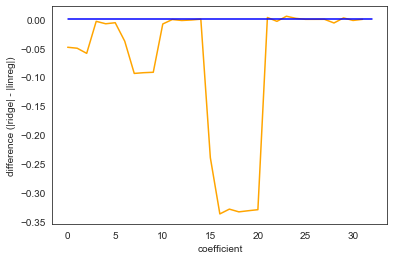

In [55]:
# Difference between linear regression coefficients and ridge regression coefficients
plt.plot((abs(coef_ridge['ridge']) - abs(coef_ridge['linreg'])),color = 'orange') # هو المتغير اللي عرفته فوق وفيه عمودين
                                                                                  # هي الرسمة تقول انه معاملات الريدج اقل من معاملات اللينيار ريغرشن
plt.plot([0,32],[0,0],color='blue') # هذا الخط الازرق بس للتمييز

plt.xlabel('coefficient')
plt.ylabel('difference (|ridge| - |linreg|)')
# plt.savefig('figures/shrink_ridge_coef.pdf')
plt.show()


### **difference= 0**    -> ridge regression hat diesem Coefficient nicht bestraft-> bspw. coefficients 4 bis 7 (sind genau wie in OLS-> entweder sind sie nicht stark korreliert oder sie haben höhe Erklärungsbedarf und macht kein Sinn, diese Coefficients zu bestrafen und runterzunehmen )

### wenn difference ist < 0    -> ridge regression hat diesem Coefficient bestraft -> bspw. Coefficients 15 bis 20 haben starke Regularizierung bekommen (sind entweder hoch korreliert oder es macht Sinn, diese Coefficients stark zu bestrafen)

### `Lasso`

**Note**: Alternative is `LassoCV` with build in cross-validation

In [58]:
from sklearn.linear_model import Lasso

In [75]:
# Dieses lambda von ridge und lasso ist nicht das Gleiche! auch Wert ist nicht immer Gleiche
# hier haben wir andere kürzere und einfach Grid von lasso lambdas ! warum kürzer? weil es dauert sehr lang beim Großen grids
# warum dauert sehr lang? Ridge regression hat analytische Lösung/Formel-> beta=np.inverse(X.TX+lambda*I)@X.T*y -> in lasso gibt kein analytische Lösung/Formel deswegen Nährungsverfahren erfordert! !sehe Seite 50
grid = {'alpha': np.arange(0.01,0.1, step=0.01)}
grid

{'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09])}

In [76]:
lasso = GridSearchCV(estimator=Lasso(), param_grid=grid)
# estimator: welche Methode nehme ich zum Schätz/Estimation -> Ridge Regression
# param_grid: der grid, die ich übergeben will -> muss voraus definiert werden
# scoring gibt meine Cross-Validierung vor, nach welche Metriken ich validieren sollte. None bedeutet dass die Verlustfunktion als Metrik verwendet

In [77]:
lasso.fit(X_train,y_train)

/Applications/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [78]:
lasso.best_params_ 

{'alpha': 0.01}

### LOOK! 
beste Parameter/Alpha an der Grenze von meinem Grid ist->entweder habe ich mein Grid super gut gewählt oder es gibt noch Verbesserungsmöglichkeiten

**Evaluation**

In [79]:
# predicting using lasso model with the best lambda=0.01
# test + training اعمل توقع باستخدام

lasso_pred_is = lasso.predict(X_train)
lasso_pred_os = lasso.predict(X_test)

In [80]:
# ماهو الخطآ الموجود عند التوقع باستخدام training daten


print('Mean absolute error: ' + str(mean_absolute_error(y_train,lasso_pred_is)))
print('Mean squared error: ' + str(mean_squared_error(y_train,lasso_pred_is)))
print('Root mean squared error: ' + str(np.sqrt(mean_squared_error(y_train,lasso_pred_is))))

Mean absolute error: 0.12301687874652766
Mean squared error: 0.029263731946367753
Root mean squared error: 0.17106645476646715


In [81]:
# ماهو الخطآ الموجود عند التوقع باستخدام test daten

print('Mean absolute error: ' + str(mean_absolute_error(y_test,lasso_pred_os)))
print('Mean squared error: ' + str(mean_squared_error(y_test,lasso_pred_os)))
print('Root mean squared error: ' + str(np.sqrt(mean_squared_error(y_test,lasso_pred_os))))

Mean absolute error: 0.13605007515601722
Mean squared error: 0.034442178842633994
Root mean squared error: 0.1855860416158338


**Comparison of coefficients**

In [82]:
coef_lasso = pd.DataFrame( np.stack((linreg.coef_,lasso.best_estimator_.coef_),axis=1), columns=['linreg','lasso'])

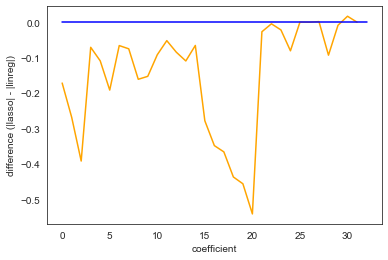

In [83]:
plt.plot(abs(coef_lasso['lasso']) - abs(coef_lasso['linreg']),color='orange')

plt.plot([0,32],[0,0],color='blue')

plt.xlabel('coefficient')
plt.ylabel('difference (|lasso| - |linreg|)')
# plt.savefig('figures/shrink_lasso_coef.pdf')
plt.show()
# Alle Variable im Endeffekt Regularizierung erfahren haben
#lasso regulariziert relativ stark-> relativ viele Variable auf 0 gesetzt

**Short note** on lasso vs. ridge
- In lasso, more coefficients are zero compared to ridge
- This might be especially useful for situations where $n<p$ or to identify most important variables

In [84]:
# In sum, there are 32 variables in the data set
print('lasso (non-zero coefficients): ' + str(sum( (abs(coef_lasso['lasso']) > 0) )))
print('ridge (non-zero coefficients): ' + str(sum( (abs(coef_ridge['ridge']) > 0) )))

lasso (non-zero coefficients): 13
ridge (non-zero coefficients): 32


In [85]:
# print(coef_lasso[abs(coef_lasso['lasso']) > 0])
print(X_train.columns[abs(coef_lasso['lasso']) > 0]) #die 13 Variablen die überbleiben

Index(['ExterQual_3', 'BsmtQual_5', 'HeatingQC_3', 'HeatingQC_5',
       'BsmtFinType1_6', 'FireplaceQu_4', 'LotFrontage', 'LotArea',
       'YearBuilt', 'GrLivArea', 'FullBath', 'Fireplaces', 'GarageArea'],
      dtype='object')


### `Forward Selection `

In [86]:
# in skilearn gibt keine Methode für Forward Selection-> Es muss eine Funktion definiert werden
import statsmodels.formula.api as smf

def forward_selected(data, response):
    """Linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    Result=[]
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
            formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
            Result.append([best_new_score,best_candidate,formula])
    #model = smf.ols(formula, data).fit()
    return Result

In [87]:
Data_train=pd.concat([y_train,X_train],axis=1)

Data_train.head()

,SalePrice,ExterQual_3,ExterQual_4,ExterQual_5,BsmtQual_3,BsmtQual_4,BsmtQual_5,HeatingQC_2,HeatingQC_3,HeatingQC_4,...,FireplaceQu_3,FireplaceQu_4,FireplaceQu_5,LotFrontage,LotArea,YearBuilt,GrLivArea,FullBath,Fireplaces,GarageArea
1148,11.669074,1,0,0,1,0,0,0,1,0,...,0,1,0,69.384154,5700,1926,7.013016,1,1,288
430,11.355101,1,0,0,1,0,0,0,1,0,...,0,0,0,21.000000,1680,1971,6.894670,1,0,264
45,12.675764,0,0,1,0,0,1,0,0,0,...,0,1,0,61.000000,7658,2005,7.468513,2,1,576
542,12.270220,0,1,0,0,0,1,0,0,0,...,1,0,0,78.000000,10140,1998,7.426549,2,1,583
673,12.458775,1,0,0,1,0,0,0,0,0,...,1,0,0,110.000000,14442,1957,7.516977,2,2,416


Text(0, 0.5, 'adjusted $R^{2}$')

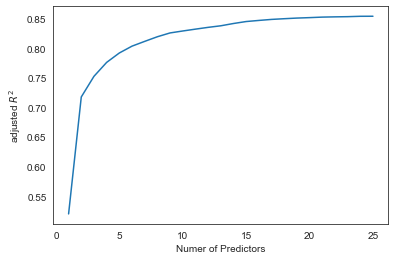

In [88]:
Output_Forward = forward_selected(Data_train, 'SalePrice')
Output_Forward = pd.DataFrame.from_records(Output_Forward)


plt.plot(np.arange(1,len(Output_Forward.iloc[:,1])+1),Output_Forward.iloc[:,0])
plt.xlabel('Numer of Predictors')
plt.ylabel('adjusted $R^{2}$')
# ab 20 bis 24 kein Erhöhung von adjusted-R^2 -> ab 20 Predictos kann ich Modell Komplexität sparen

### Forward Selection fange ich ab dem null Modell an -> Null Modell hat die Konstante (1) und dann probiere ich alle anderen Variable aus, und ich suche nach Variable, die am besten dazu passen (die R^2 erhöht)-> ich fange jetzt mit der neuen Variable und Konstante an, ich probiere alle anderen verfügbaren Variable aus. ich suche nach Variable, die R^2 am besten erhöht und so weiter....



In [89]:
Output_Forward
#ab 13 Predictor ist Zugewinn des In-Sample-Fit  relativ klein , adjusted-R^2=0.842 dann 0.845

,0,1,2
0,0.520270,GrLivArea,SalePrice ~ GrLivArea + 1
1,0.717910,YearBuilt,SalePrice ~ GrLivArea + YearBuilt + 1
2,0.752808,GarageArea,SalePrice ~ GrLivArea + YearBuilt + GarageArea...
3,0.776339,Fireplaces,SalePrice ~ GrLivArea + YearBuilt + GarageArea...
4,0.792244,BsmtQual_5,SalePrice ~ GrLivArea + YearBuilt + GarageArea...
5,0.803804,Functional_7,SalePrice ~ GrLivArea + YearBuilt + GarageArea...
6,0.811865,BsmtFinType1_6,SalePrice ~ GrLivArea + YearBuilt + GarageArea...
7,0.819694,LotArea,SalePrice ~ GrLivArea + YearBuilt + GarageArea...
8,0.826133,HeatingQC_5,SalePrice ~ GrLivArea + YearBuilt + GarageArea...
9,0.829419,BsmtFinType1_5,SalePrice ~ GrLivArea + YearBuilt + GarageArea...


# **Note**: We take the same number of coefficients as in  `LassoCV` 

**Evaluation**

In [90]:
Forward=smf.ols(Output_Forward.iloc[11,2], Data_train).fit()
print(Forward.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     432.0
Date:                Thu, 26 Dec 2019   Prob (F-statistic):               0.00
Time:                        18:47:29   Log-Likelihood:                 446.47
No. Observations:                1019   AIC:                            -866.9
Df Residuals:                    1006   BIC:                            -802.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.8503      0.447      4.

In [91]:
Forward_pred_is = Forward.predict(X_train)
Forward_pred_os = Forward.predict(X_test)

print('Mean absolute error: ' + str(mean_absolute_error(y_train,Forward_pred_is)))
print('Mean squared error: ' + str(mean_squared_error(y_train,Forward_pred_is)))
print('Root mean squared error: ' + str(np.sqrt(mean_squared_error(y_train,Forward_pred_is))))



Mean absolute error: 0.11600804534412497
Mean squared error: 0.024375799558260695
Root mean squared error: 0.15612751057472446


In [92]:
print('Mean absolute error: ' + str(mean_absolute_error(y_test,Forward_pred_os)))
print('Mean squared error: ' + str(mean_squared_error(y_test,Forward_pred_os)))
print('Root mean squared error: ' + str(np.sqrt(mean_squared_error(y_test,Forward_pred_os))))
# aus forward selection kann ich nicht 100% garantieren dass ich die beste Schätzung Out-Of-Sample habe

Mean absolute error: 0.1262006373855597
Mean squared error: 0.02930686266711159
Root mean squared error: 0.17119247257724737


### `RFE Method` Recursive Feature Elimination (relative ähnlich zu Backward Selection)

Es wird hier kein R^2 gerechnet sondern sie sagen einfach "das wer höchsten Coefficients hat, hat die höchsten Einfluss" -> das macht Sinn, wenn ich nur metreische Variable habe, die standardisiert habe -> ich darf nur standardisierte x hernehmen 

(standardisierte x's bedeutet, dass ich x's interpretieren kann. bspw. ich habe 2 verschiedene x Variable und ich habe die beiden standardisiert und die erste Variable-Coefficient=0.5 und die zweit Variable-Coefficients=1.5 -> die zweite Variable hat höhere Einfluss)

Sklearn Description:

Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. 

First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute. 

Then, the least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

In [93]:
from sklearn.feature_selection import RFE
from sklearn.feature_selection import chi2
from sklearn.linear_model import LinearRegression

model = LinearRegression()
rfe = RFE(model, 12)# ich will optimales Modell durch diese RFE wo am Ende 12 Variablen drinn sind (also 12 Features number)
rfe = rfe.fit(X_train, y_train)
X_train.iloc[:,rfe.support_].columns

rfe_pred_is = rfe.predict(X_train)
rfe_pred_os = rfe.predict(X_test)

print('Mean absolute error: ' + str(mean_absolute_error(y_train,rfe_pred_is)))
print('Mean squared error: ' + str(mean_squared_error(y_train,rfe_pred_is)))
print('Root mean squared error: ' + str(np.sqrt(mean_squared_error(y_train,rfe_pred_is))))




Mean absolute error: 0.14746922010648178
Mean squared error: 0.037380250198655755
Root mean squared error: 0.1933397274195238


In [94]:
print('Mean absolute error: ' + str(mean_absolute_error(y_test,rfe_pred_os)))
print('Mean squared error: ' + str(mean_squared_error(y_test,rfe_pred_os)))
print('Root mean squared error: ' + str(np.sqrt(mean_squared_error(y_test,rfe_pred_os))))

Mean absolute error: 0.1439206133650596
Mean squared error: 0.03759612294524489
Root mean squared error: 0.19389719684731105


In [95]:
Comp=pd.concat([pd.DataFrame(X_train.iloc[:,rfe.support_].columns.values).sort_values(by=0).reset_index(),
                pd.DataFrame(Output_Forward.iloc[0:12,1].values).sort_values(by=0).reset_index()],axis=1,ignore_index=True).iloc[:,[1,3]]
Comp.columns="RFE Forward".split()
Comp

# wichtig ist dass die Variable aus Forward Selection müssen nicht mit Backward Selection oder Recursive Elimintation Methode übereinstimmen

,RFE,Forward
0,BsmtQual_4,BsmtFinType1_5
1,BsmtQual_5,BsmtFinType1_6
2,ExterQual_3,BsmtQual_5
3,ExterQual_4,Fireplaces
4,ExterQual_5,Functional_7
5,Functional_2,GarageArea
6,Functional_3,GrLivArea
7,Functional_4,HeatingQC_4
8,Functional_5,HeatingQC_5
9,Functional_6,LotArea
